# Importation des packages et importer les données

In [1]:
#Import packages

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn.decomposition as PCA
import sklearn.preprocessing as StandardScaler
import scipy.stats as stats

In [3]:
# Importation du dataframe

df=pd.read_csv("iris.csv")
#Afficher les premières lignes du tableau
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
#Analyse de la dimension de la base de données


df.shape

(150, 5)

In [4]:
# Analyse du type de variable dans la base de données

df.dtypes

sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
variety          object
dtype: object

In [5]:
# Analyse de données manquantes

df.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

# Analyses descriptives univariées

In [6]:
# Analyse desciptive du jeu de données
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# Description des variables qualitatives
df.describe(include="object")


,variety
count,150
unique,3
top,Setosa
freq,50


<AxesSubplot:>

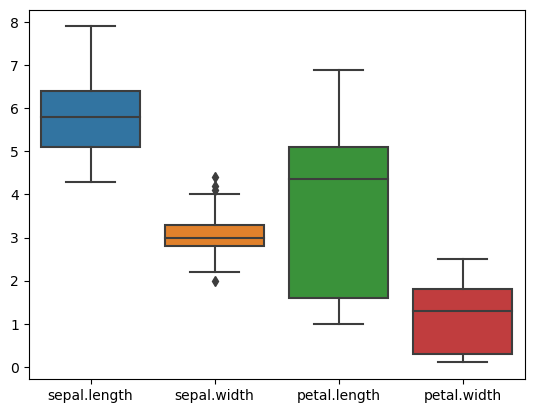

In [8]:
# Analyse descriptive des variables quantitatives
sns.boxplot(data=df)

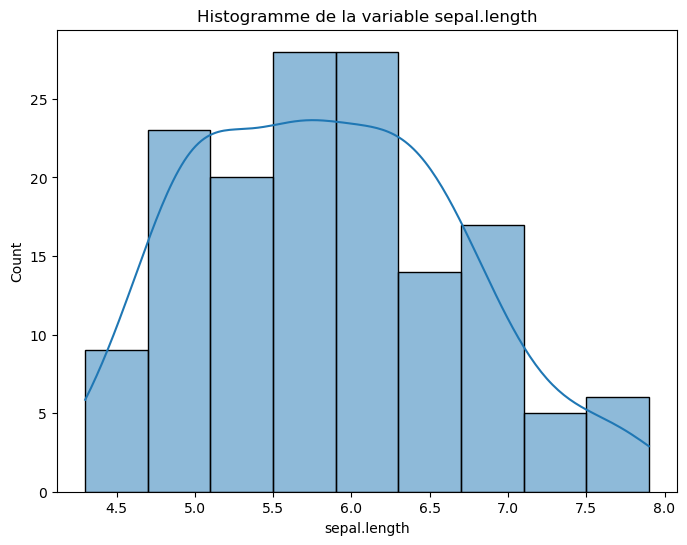

La variable sepal.length suit une loi normale (p-value=0.05682424941067306)


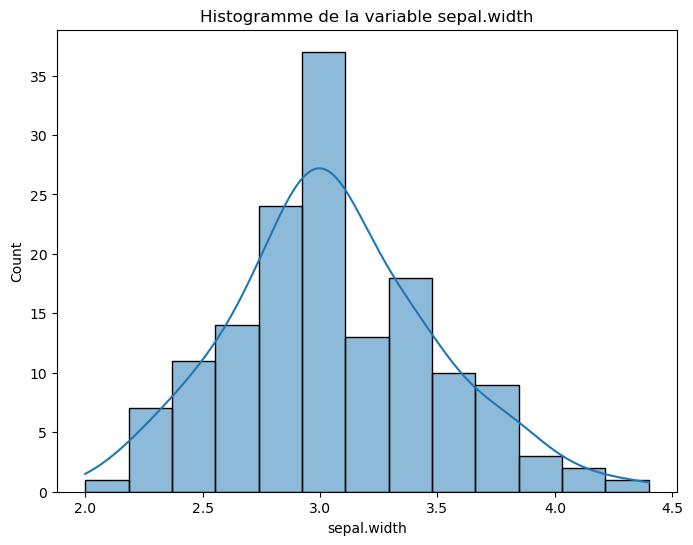

La variable sepal.width suit une loi normale (p-value=0.2097338099298262)


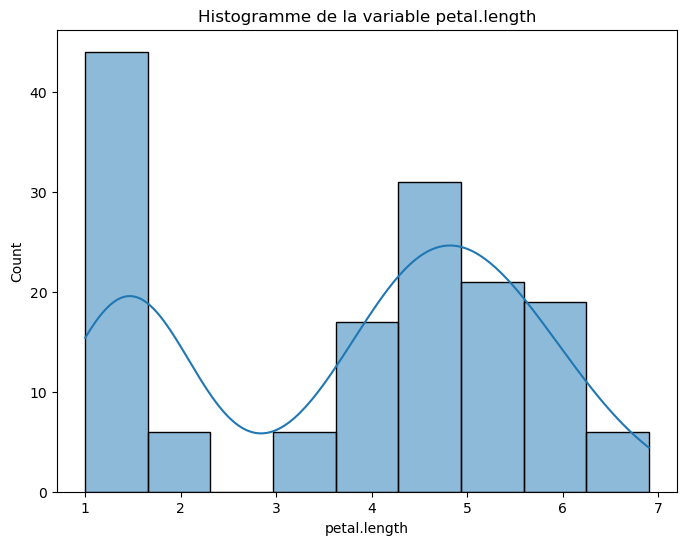

La variable petal.length ne suit pas une loi normale (p-value=7.264667501338673e-49)


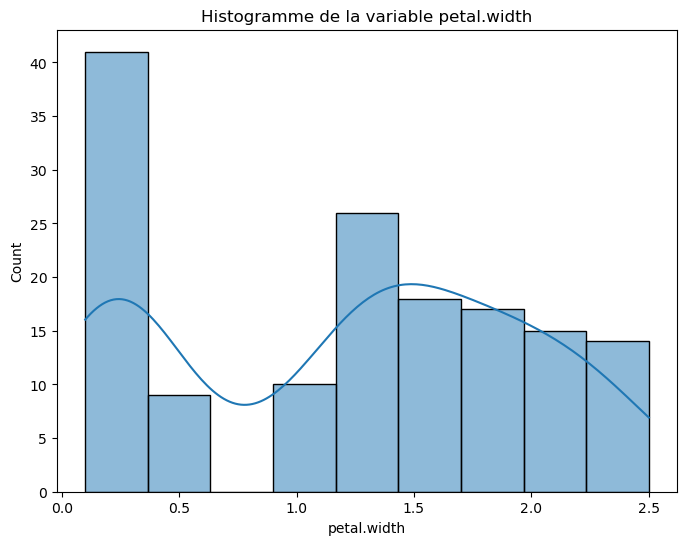

La variable petal.width ne suit pas une loi normale (p-value=1.3492785927137586e-30)


In [9]:
# Analyse de la normalité


# Création d'un histogramme et d'un test de normalité pour chaque variable
for column in df.columns[:-1]:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f"Histogramme de la variable {column}")
    plt.show()

    statistic, p_value = stats.normaltest(df[column])
    if p_value < 0.05:
        print(f"La variable {column} ne suit pas une loi normale (p-value={p_value})")
    else:
        print(f"La variable {column} suit une loi normale (p-value={p_value})")

<AxesSubplot:xlabel='variety', ylabel='count'>

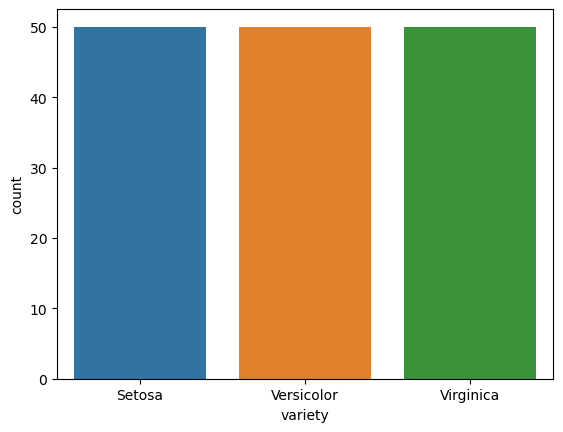

In [10]:
# Analyse de la variable qualitative

sns.countplot(x=df['variety'])

([<matplotlib.patches.Wedge at 0x7f92f07e8160>,
 [Text(0.5499999702695115, 0.9526279613277875, 'Setosa'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, 'Versicolor'),
  Text(0.5500001486524351, -0.9526278583383437, 'Virginica')])

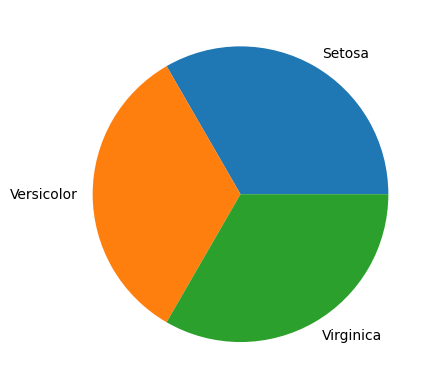

In [11]:
# Création d'un tableau de fréquences pour la variable "species"
freq_table = (df['variety'].value_counts())/len(df)

freq_table

#Création d'un diagramme circulaire pour le tableua de fréquence


plt.pie(freq_table,labels=freq_table.index)

# Analyse bivariées

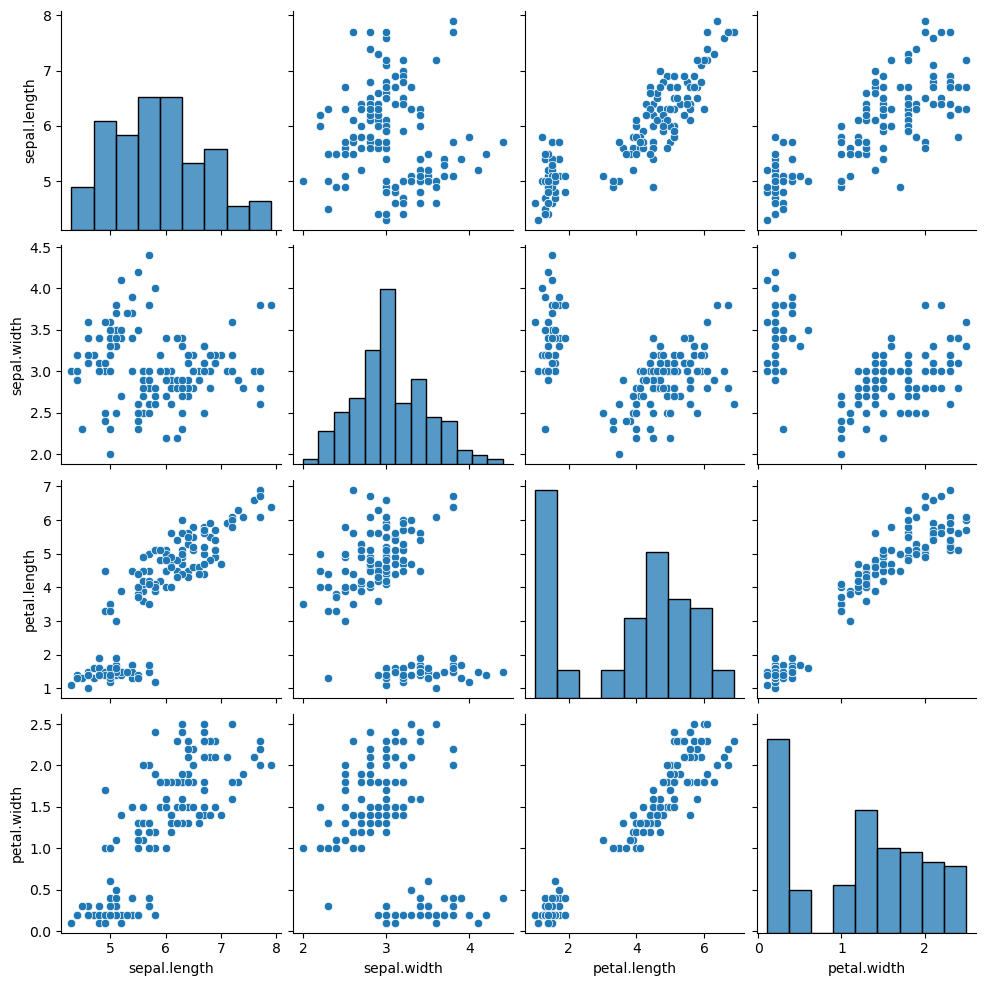

In [12]:
# Relation entre les variables quantitatives

sns.pairplot(df)

<AxesSubplot:>

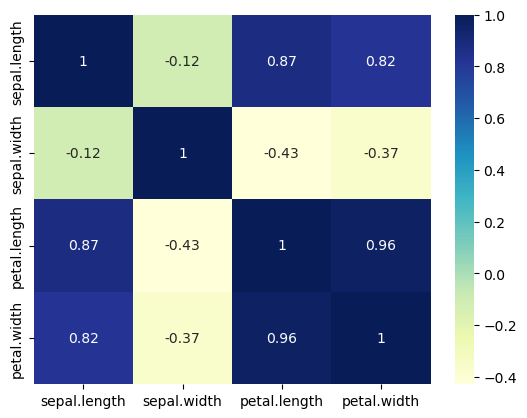

In [13]:
# Obtenir le tableau de corélation et la heatmap

corr_matrix = df.corr()

# Calcul des p-values pour chaque paire de variables
sns.heatmap(corr_matrix,annot=True,cmap="YlGnBu")



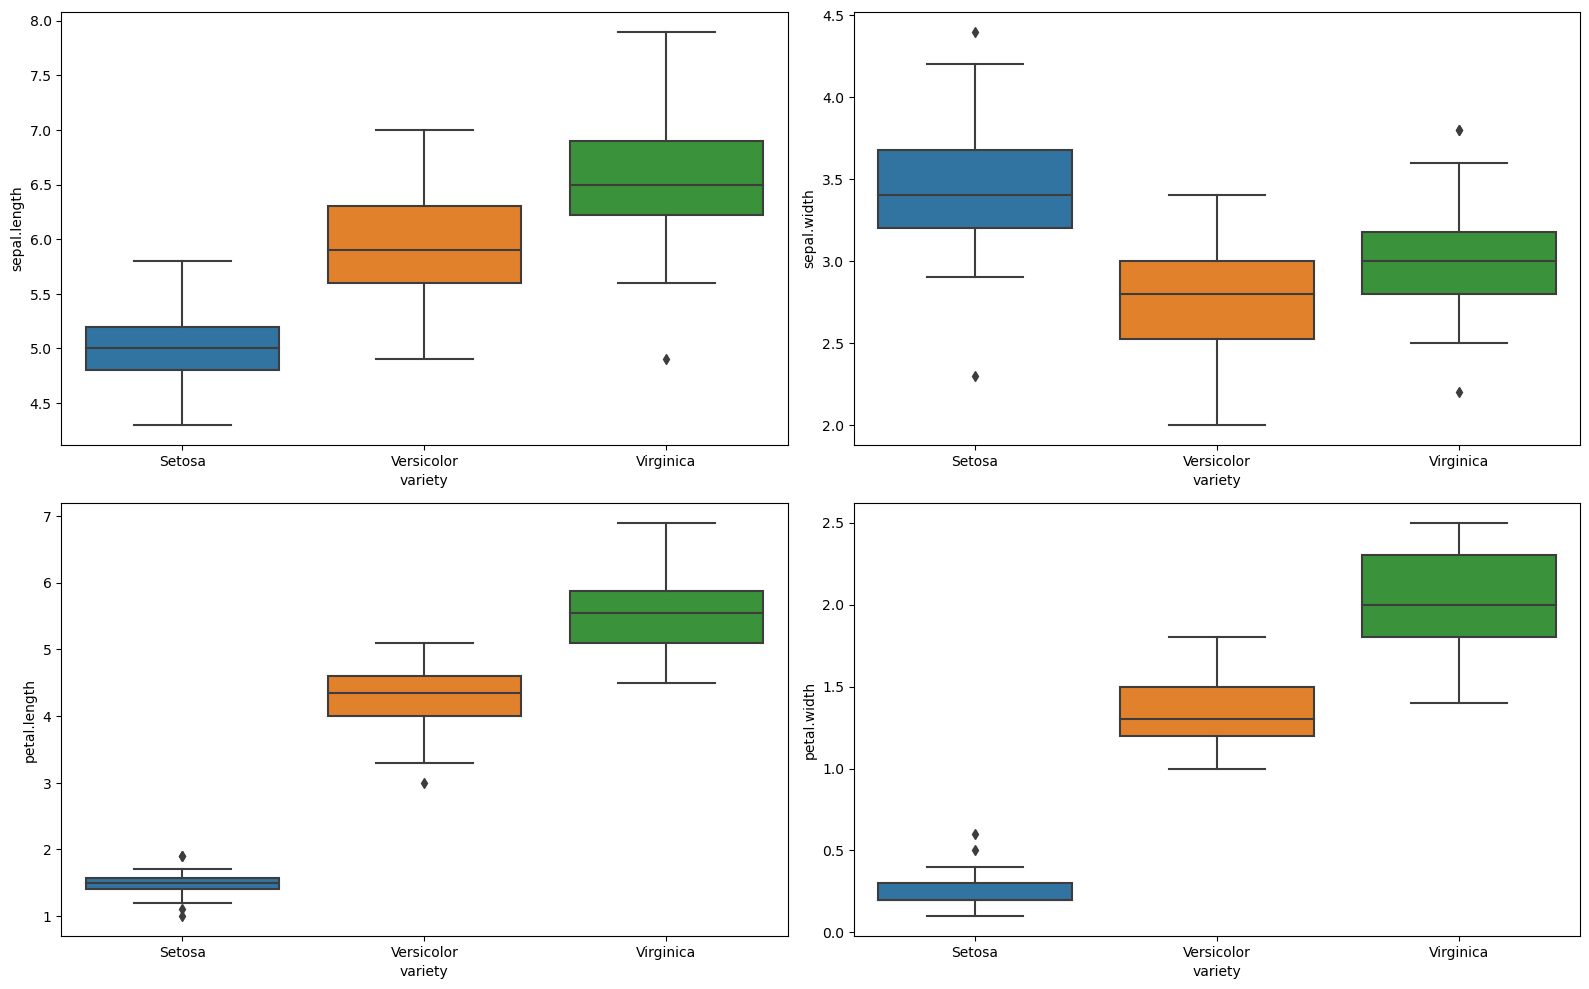

In [4]:
#Analyse des relations entre les variables et la variété de fleur

# Création des boxplots pour chaque variable en fonction de l'espèce de la fleur
fig,ax = plt.subplots(nrows = 2, ncols=2, figsize=(16,10))
row = 0
col = 0
for i in range(len(df.columns) -1):
    if col > 1:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = df['variety'], y = df[df.columns[i]],ax = axes)
    col += 1
plt.tight_layout()
# plt.title("Individual Features by Class")
plt.show()





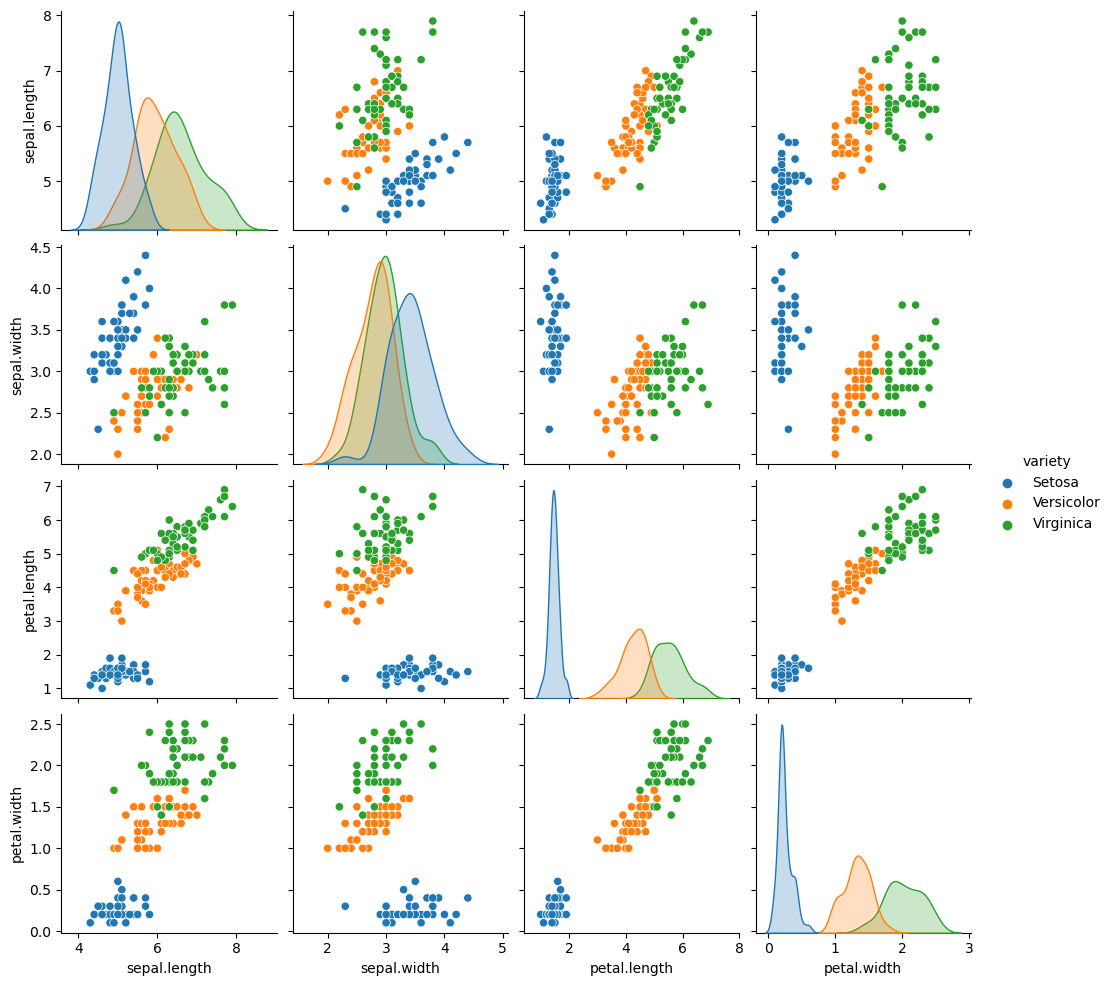

In [15]:
# pairplot

p=sns.pairplot(df, hue = 'variety')

In [16]:


# Confirmation des liaison avec un test de Kruskal-Wallis pour chaque variable

for column in df.columns[:-1]:
    _, p_value = stats.kruskal(*[df[column][df.variety == variety] for variety in df.variety.unique()])
    if p_value < 0.05:
        print(f"La variable {column} est significativement différente entre les espèces (p-value={p_value})")
    else:
        print(f"La variable {column} n'est pas significativement différente entre les espèces (p-value={p_value})")

La variable sepal.length est significativement différente entre les espèces (p-value=8.91873433246198e-22)
La variable sepal.width est significativement différente entre les espèces (p-value=1.5692820940316782e-14)
La variable petal.length est significativement différente entre les espèces (p-value=4.803973591157605e-29)
La variable petal.width est significativement différente entre les espèces (p-value=3.261795552421968e-29)


# Analyse multivariée avec l'ACP

## Construction de l'ACP

In [17]:
# Importation des packages
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [18]:
# Séparation des données en variables explicatives (X) et variable qualitative (Y)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [19]:
# Standardisation des données
# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [20]:
# Réduction de dimension
pca = PCA()
X_pca=pca.fit_transform(X)

## Aide à l'interprétation

### Choix du nombre d'axe

In [21]:
# Analyse des valeurs propres
comp = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(4)], 
        "Valeur propre" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    },
    columns = ["Dimension", "Valeur propre", "% variance expliquée", "% cum. var. expliquée"]
)
comp

,Dimension,Valeur propre,% variance expliquée,% cum. var. expliquée
0,Dim1,4.228242,92.0,92.0
1,Dim2,0.242671,5.0,98.0
2,Dim3,0.078210,2.0,99.0
3,Dim4,0.023835,1.0,100.0


Text(3.25, 26, '25%')

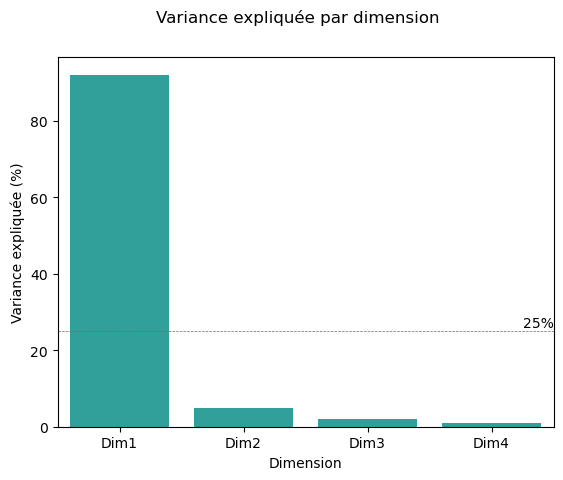

In [22]:
# Scree plot pour choisir le nombre de composantes principales
g_comp = sns.barplot(x = "Dimension", 
                y = "% variance expliquée",
                palette = ["lightseagreen"],
                data = comp)
g_comp.set(ylabel = "Variance expliquée (%)")
g_comp.figure.suptitle("Variance expliquée par dimension")
plt.axhline(y = 25, linewidth = .5, color = "dimgray", linestyle = "--") # 25 = 100 / 4 (nb dimensions)
plt.text(3.25, 26, "25%")


### Autres aide à l'interprétation

##### Qualité de représentation des variables et contribution à la formation des axes

Lors de l'analyse en composantes principales (ACP), il est important de mesurer la qualité de représentation des variables sur les axes principaux et leur contribution à la formation de ces axes.

**Qualité de représentation des variables (cosinus carré)**

La qualité de représentation des variables est souvent mesurée à l'aide du carré du cosinus de l'angle entre les vecteurs représentant les variables et les axes principaux. Le cosinus carré est également appelé **cos2**. Pour une variable donnée, la somme des cos2 sur tous les axes principaux est égale à 1.

La formule pour calculer le cos2 pour une variable `i` sur un axe principal `k` est la suivante :

$$
\text{cos}^2(i, k) = \frac{\text{coord}(i, k)^2}{\lVert\text{coord}(i)\rVert^2}
$$


ooù $\text{coord}(i, k)$ est la coordonnée de la variable `i` sur l'axe principal `k`.


**Un seuil couramment utilisé pour interpréter la qualité de représentation des variables est 0,5**. Si le cos2 d'une variable est supérieur à 0,5 sur un axe principal, cela signifie que cet axe représente bien la variable.

**Contribution des variables à la formation des axes (CTR)**

La contribution des variables à la formation des axes indique l'importance relative de chaque variable pour expliquer la variabilité des données sur un axe principal donné. Cette contribution est souvent exprimée en pourcentage et est calculée à l'aide de la formule suivante :

$$
\text{CTR}(i, k) = \frac{\text{coord}(i, k)^2}{n \cdot \lambda_k}
$$


où :
- $\text{coord}(i, k)$ est la coordonnée de la variable `i` sur l'axe principal `k`
- $n$ est le nombre total de variables
- $\lambda_k$ est la valeur propre associée à l'axe principal `k`


Il est important de noter que la somme des contributions des variables sur un axe principal donné est égale à 100 %.

En interprétant les contributions des variable  à la formation des axes, **il est courant de considérer les variables ayant une contribution supérieure à la contribution moyenne (100 % / nombre de variables)** comme étant importantes pour la formation de l'axe principal considéré.

In [23]:
# Calcul du cosinus carré des variables
cos_squared = np.square(pca.components_)

# Création d'un dataframe pandas avec le cosinus carré des variables
df_cos_squared = pd.DataFrame(cos_squared, columns=['PC{}'.format(i+1) for i in range(X.shape[1])])
df_cos_squared.index = df.columns[:-1]

print(df_cos_squared)

                   PC1       PC2       PC3       PC4
sepal.length  0.130600  0.007144  0.733885  0.128371
sepal.width   0.431109  0.533136  0.030058  0.005697
petal.length  0.338759  0.357497  0.005812  0.297932
petal.width   0.099532  0.102223  0.230245  0.568000


In [24]:
# Contribution à la formation de l'axe
# Obtenir les composantes principales
components = pca.components_

n_components = X.shape[1]
feature_names=df.columns[0:4]
# Calculer la contribution des variables à la formation des axes
loadings = pca.components_.T
eigenvalues = pca.explained_variance_
variable_contributions = (loadings**2) * eigenvalues

# Créer un DataFrame pour faciliter l'affichage des résultats
column_names = [f'PC{i+1}_contrib' for i in range(n_components)]
variable_contrib_df = pd.DataFrame(variable_contributions, columns=column_names, index=feature_names)

print(variable_contrib_df)

              PC1_contrib  PC2_contrib  PC3_contrib  PC4_contrib
sepal.length     0.552210     0.104617     0.026494     0.002372
sepal.width      0.030207     0.129376     0.027960     0.002436
petal.length     3.103041     0.007294     0.000455     0.005488
petal.width      0.542784     0.001383     0.023301     0.013538


In [25]:
# Calculer la contribution des variables à la formation des axes
loadings = pca.components_.T
eigenvalues = pca.explained_variance_
variable_contributions = (loadings**2) * eigenvalues

# Convertir les contributions en pourcentage
variable_contrib_percent = variable_contributions / eigenvalues * 100

# Créer un DataFrame pour faciliter l'affichage des résultats
column_names = [f'PC{i+1}_contrib' for i in range(n_components)]
variable_contrib_df = pd.DataFrame(variable_contrib_percent, columns=column_names, index=feature_names)

print(variable_contrib_df)

              PC1_contrib  PC2_contrib  PC3_contrib  PC4_contrib
sepal.length    13.060027    43.110881    33.875875     9.953217
sepal.width      0.714406    53.313572    35.749736    10.222286
petal.length    73.388453     3.005808     0.581194    23.024545
petal.width     12.837115     0.569738    29.793195    56.799951


#### Qualité de représentation des individus et contribution à la formation des axes

Lors de l'analyse en composantes principales (ACP), il est important de mesurer la qualité de représentation des individus sur les axes principaux et leur contribution à la formation de ces axes.

**Qualité de représentation des individus (cosinus carré)**

La qualité de représentation des individus est souvent mesurée à l'aide du carré du cosinus de l'angle entre les vecteurs représentant les individus et les axes principaux. Le cosinus carré est également appelé **cos²**. Pour un individu donné, la somme des cos² sur tous les axes principaux est égale à 1.

La formule pour calculer le cos² pour un individu `i` sur un axe principal `k` est la suivante :

$$
\text{cos}^2(i, k) = \frac{\text{coord}(i, k)^2}{\lVert\text{coord}(i)\rVert^2}
$$

où $\text{coord}(i, k)$ est la coordonnée de l'individu `i` sur l'axe principal `k`.

Un seuil couramment utilisé pour interpréter la qualité de représentation des individus est 0,5. Si le cos² d'un individu est supérieur à 0,5 sur un axe principal, cela signifie que cet axe représente bien l'individu.

**Contribution des individus à la formation des axes (CTR)**

La contribution des individus à la formation des axes indique l'importance relative de chaque individu pour expliquer la variabilité des données sur un axe principal donné. Cette contribution est souvent exprimée en pourcentage et est calculée à l'aide de la formule suivante :

$$
\text{CTR}(i, k) = \frac{\text{coord}(i, k)^2}{n \cdot \lambda_k}
$$

où :
- $\text{coord}(i, k)$ est la coordonnée de l'individu `i` sur l'axe principal `k`
- $n$ est le nombre total d'individus
- $\lambda_k$ est la valeur propre associée à l'axe principal `k`

Il est important de noter que la somme des contributions des individus sur un axe principal donné est égale à 100 %.

En interprétant les contributions des individus à la formation des axes, **il est courant de considérer les individus ayant une contribution supérieure à la contribution moyenne (100 % / nombre d'individus) comme étant importants pour la formation de l'axe principal considéré**.

In [26]:
# Calculer la contribution des individus à la formation des axes
eigenvalues = pca.explained_variance_
contributions = (X_pca**2) / (X_pca.shape[0] * eigenvalues)

# Convertir les contributions en pourcentage
contrib_percent = contributions * 100

# Créer un DataFrame pour faciliter l'affichage des résultats
column_names = [f'PC{i+1}_contrib' for i in range(n_components)]
contrib_df = pd.DataFrame(contrib_percent, columns=column_names)

print(contrib_df)

     PC1_contrib  PC2_contrib  PC3_contrib  PC4_contrib
0       1.135938     0.280255     0.006642     0.000143
1       1.161486     0.086068     0.377577     0.274281
2       1.315955     0.057720     0.002731     0.011153
3       1.188344     0.278331     0.008490     0.159756
4       1.173994     0.293315     0.069167     0.104961
..           ...          ...          ...          ...
145     0.595923     0.096615     0.269548     5.080547
146     0.367724     0.386979     0.126661     1.809735
147     0.490813     0.017084     0.145127     0.524978
148     0.569753     0.037368     4.458903     0.055625
149     0.304717     0.219494     1.122655     0.672313

[150 rows x 4 columns]


# Représentation graphique et interprétation

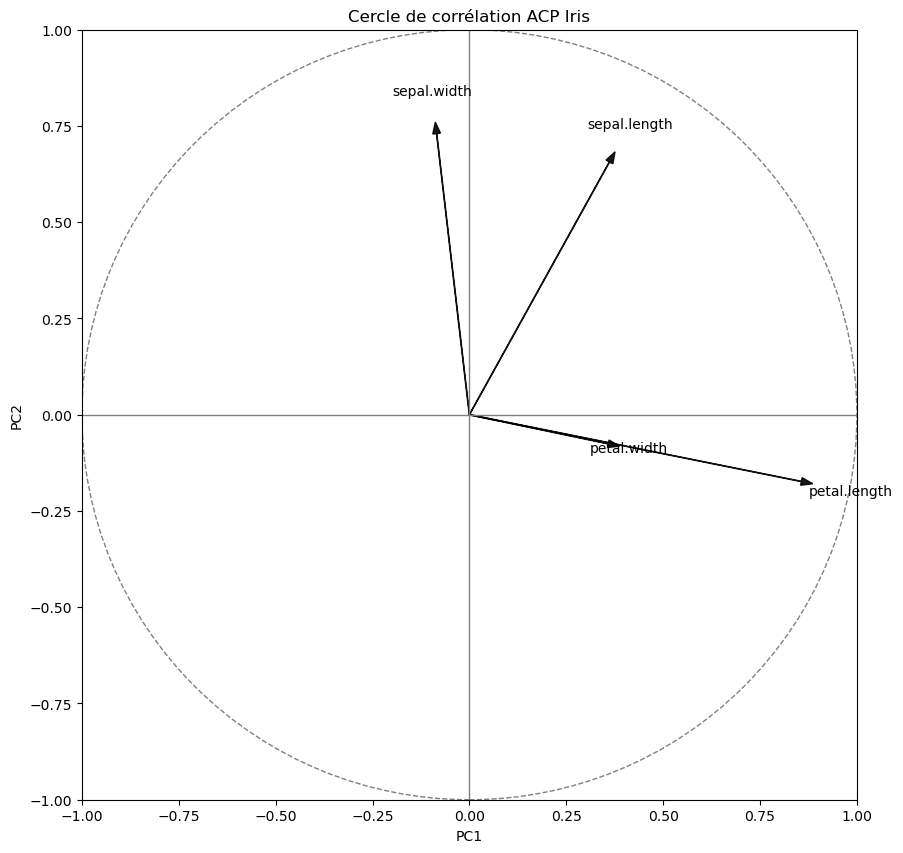

In [27]:


# Créer le cercle de corrélation
coeff = np.transpose(pca.components_[0:2, :])
n = coeff.shape[0]
xs = np.array([1, 0])
ys = np.array([0, 1])

# Créer la figure
plt.figure(figsize=(10, 10))

# Placer les vecteurs des variables
for i in range(n):
    plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='k', alpha=0.9, head_width=0.02)
    plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, feature_names[i], color='k', ha='center', va='center')

# Placer le cercle unitaire
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Ajuster les limites et les axes
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cercle de corrélation ACP Iris')

# Afficher la figure
plt.show()


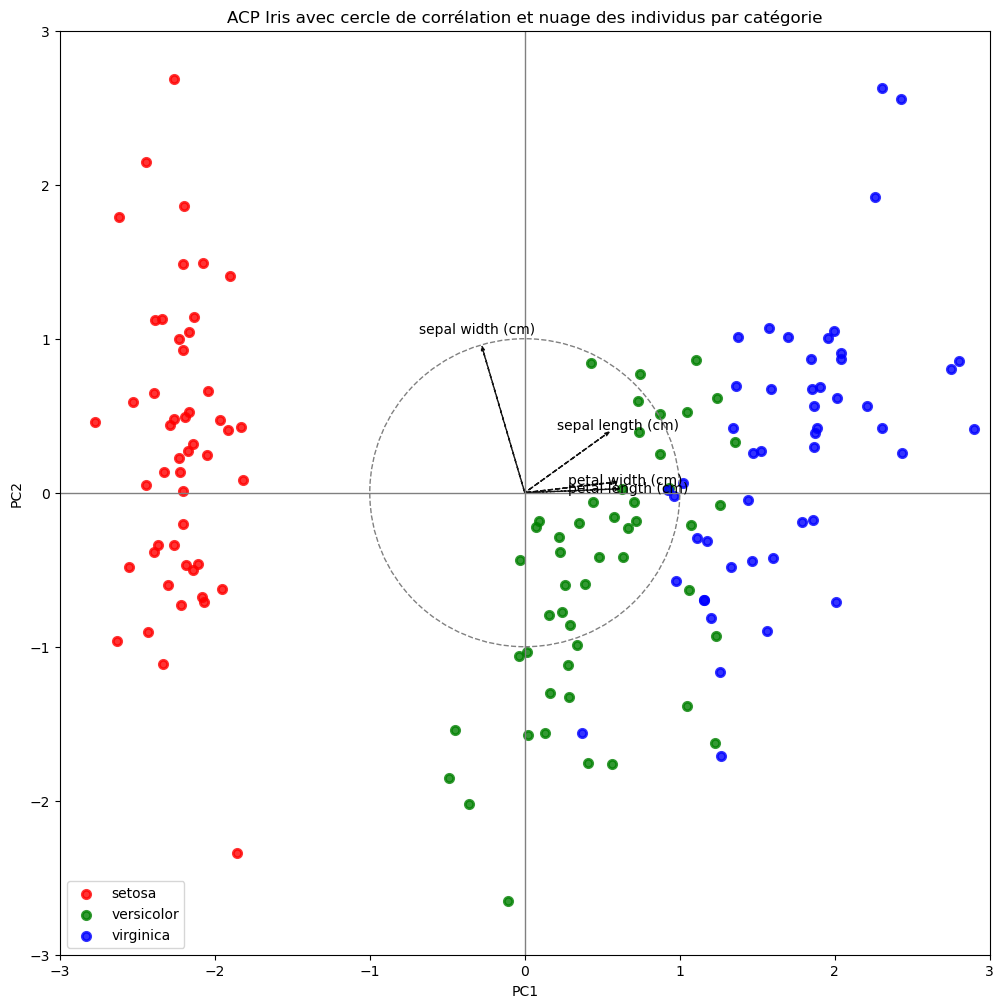

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Charger les données Iris
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Appliquer l'ACP
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Créer le cercle de corrélation
coeff = np.transpose(pca.components_[0:2, :])
n = coeff.shape[0]

# Créer la figure
fig, ax = plt.subplots(figsize=(12, 12))

# Visualiser les catégories d'espèces avec les couleurs
colors = ['r', 'g', 'b']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=.8, lw=lw, label=target_name)

# Placer les vecteurs des variables
for i in range(n):
    plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='k', alpha=0.9, head_width=0.02, linestyle='--')
    plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, iris.feature_names[i], color='k', ha='center', va='center')

# Placer le cercle unitaire
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Ajuster les limites et les axes
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('ACP Iris avec cercle de corrélation et nuage des individus par catégorie')

# Afficher la légende
plt.legend(loc='best', shadow=False, scatterpoints=1)

# Afficher la figure
plt.show()